In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from matplotlib import collections  as mc
import pandas as pd
import numpy as np
from collections import Counter



In [3]:
#import matplotlib.font_manager as font_manager

#fuente=['/content/HelveticaNeueLTStd-Th.otf',]
#font_manager.FontManager.addfont(path=fuente)
#font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
#font_list = font_manager.createFontList(font_files)
#font_manager.fontManager.ttflist.extend(font_list)

#plt.rcParams['font.family'] = 'HelveticaNeueLTStd-Th.otf'

In [4]:
def puntoyComa(a):
  return '{:,}'.format(a).replace(',','~').replace('.',',').replace('~','.')



In [5]:
db = pd.read_excel("GraficoINDEC.xlsx")

In [6]:
db

,mesnum,Mes,label x,Año,Expo,media,Impo,media.1,media sin 2009,max expo,min expo,media impo,max impo
0,1,ene,NaN,2009,3714.716096,4555.362459,2760.07,4414.850769,4625.416322,5399.277218,3795.979014,4552.749167,5743.0
1,1,ene,NaN,2010,4408.151839,4555.362459,3209.19,4414.850769,NaN,NaN,NaN,NaN,NaN
2,1,ene,NaN,2011,5185.117506,4555.362459,4889.21,4414.850769,NaN,NaN,NaN,NaN,NaN
3,1,ene,NaN,2012,5399.277218,4555.362459,5363.75,4414.850769,NaN,NaN,NaN,NaN,NaN
4,1,ene,NaN,2013,5383.027831,4555.362459,5358.23,4414.850769,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,12,dic,NaN,2016,4649.443384,4938.522949,4594.79,4620.758333,NaN,NaN,NaN,NaN,NaN
151,12,dic,NaN,2017,4578.420999,4938.522949,5366.00,4620.758333,NaN,NaN,NaN,NaN,NaN
152,12,dic,NaN,2018,5336.414287,4938.522949,3917.00,4620.758333,NaN,NaN,NaN,NaN,NaN
153,12,dic,NaN,2019,5374.345380,4938.522949,3133.00,4620.758333,NaN,NaN,NaN,NaN,NaN


In [7]:
meses = db["Mes"].tolist()
cantidadMuestrasMes = Counter(meses)
expo = db["Expo"].tolist()
mediaExpo = db["media"].tolist()
impo = db["Impo"].tolist()
mediaImpo = db["media.1"].tolist()

In [8]:
meses = ['ene','feb','mar','abr','may','jun','jul','ago','sep','oct','nov','dic']
muestrasxMes = [0]
for mes in meses:
  muestrasxMes.append(cantidadMuestrasMes[mes])
muestrasxMes_acum = np.add.accumulate(muestrasxMes).tolist()


In [9]:
#Recorto la serie por cada mes y le agrego valores nulos para correr los meses en el eje x
expoMeses=[]
impoMeses=[]
mediaExpoMeses=[]
mediaImpoMeses=[]
def corrimientoMuestras(datos, promedio):
  for i in range(12):
    for x in range(muestrasxMes_acum[i]):
      datos[i].insert(x, None)
      promedio[i].insert(x, None)

for i in range(12):
  expoMeses.append(expo[muestrasxMes_acum[i]:muestrasxMes_acum[i+1]])
  mediaExpoMeses.append(mediaExpo[muestrasxMes_acum[i]:muestrasxMes_acum[i+1]])


for i in range(12):
  impoMeses.append(impo[muestrasxMes_acum[i]:muestrasxMes_acum[i+1]])
  mediaImpoMeses.append(mediaImpo[muestrasxMes_acum[i]:muestrasxMes_acum[i+1]])
    

#descarto los valores del 2019 porque fue un año de crisis
for i, mes in enumerate(expoMeses):
  expoMeses[i] = mes[2:]
for i, mes in enumerate(impoMeses):
  impoMeses[i] = mes[2:]


In [10]:
#agrego el dato de diciembre del 21, es decir el ultimo valor de los diciembres que estan en el indice [11]
expoMeses[11].append(7000)

In [11]:
#Extraemos solo los valores del 2021
impoUltimoAnio = []
expoUltimoAnio = []
for mes in expoMeses:
  if len(mes) <11:
    expoUltimoAnio.append('--')
  else:
     expoUltimoAnio.append(puntoyComa(round(mes[-1])))
for mes in impoMeses:
  if len(mes) <11:
    impoUltimoAnio.append('--')
  else:
    impoUltimoAnio.append(puntoyComa(round(mes[-1])))

In [12]:
def maxMinLista (val):
  extremosEstac = []
  for mes in val:
    max_val = max(mes)
    max_idx = mes.index(max_val)
    min_val = min(mes)
    min_idx = mes.index(min_val)
    maxi = (max_val,max_idx)
    mini = (min_val,min_idx)
    media = sum(mes)/len(mes)
    extremosEstac.append([maxi,mini,media])
  extremosEstac = list(zip(*extremosEstac[::-1]))
  for i, ex in enumerate(extremosEstac):
    extremosEstac[i] = list(extremosEstac[i])
    extremosEstac[i].reverse()
  return extremosEstac


In [13]:
anios = []
for i in range(13):
  anios.append(str(2011 + i))

In [14]:
def datosTabla(tabla, ultiAnio):
  out = [[],[],[],[]]
  for max in tabla[0]:
    numeros = puntoyComa(round(max[0]))
    out[0].append(str(numeros)+" ("+anios[max[1]]+")")
  for min in tabla[1]:
    numeros = puntoyComa(round(min[0]))
    out[1].append(str(numeros)+" ("+anios[min[1]]+")")
  for prom in tabla[2]:
    numeros = puntoyComa(round(prom))
    out[2].append(str(numeros))
  #agregamos una fila con los valores del 2021
  for dato in ultiAnio:
    out[3].append(dato)
  return out




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


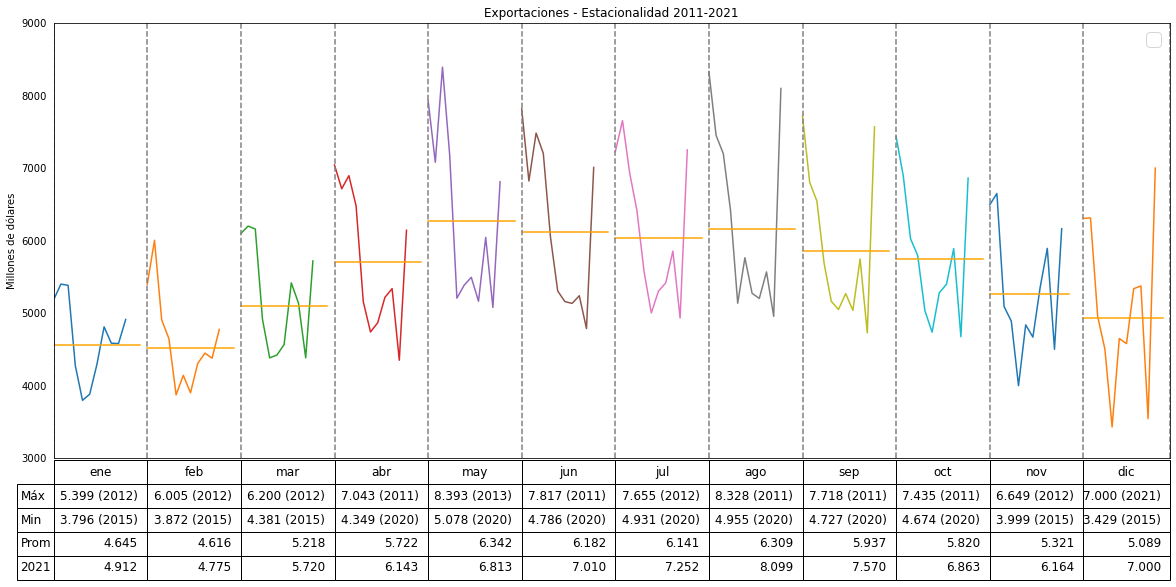

In [16]:
col_width = []
for muestra in muestrasxMes[1:]:
  col_width.append(muestra/sum(muestrasxMes))

plt.figure(figsize=(20, 8))

#dibujo el valor de diciembre del 2021
#expoMeses[11]

tabla = plt.table(
            datosTabla(maxMinLista(expoMeses), expoUltimoAnio),
            colLabels=meses,
            rowLabels=['Máx','Min','Prom','2021'],
            colWidths=col_width,
            bbox=[0, -0.28, 1, 0.275],
            )

tabla.auto_set_font_size(False)
tabla.set_fontsize(12)


corrimientoMuestras(expoMeses, mediaExpoMeses)
# plotting the points
for i in range(12):
  plt.plot(expoMeses[i])
  plt.plot(mediaExpoMeses[i], color = "orange")
  

 
# naming the x axis
#plt.xlabel('Meses')
# naming the y axis
plt.ylabel('Millones de dólares')
 
# giving a title to my graph
plt.title('Exportaciones - Estacionalidad 2011-2021')

#pongo meses en el eje x
#plt.xticks(muestrasxMes_acum, meses, rotation='vertical')
plt.xticks([])
plt.tick_params(left = False, bottom = False)

#dibujo lineas verticales por mes
for muestras in muestrasxMes_acum:
    plt.axvline(muestras, color='grey', linestyle='--' )

#cambio los límites del eje y
plt.ylim(3000,9000)
 
##armamos un cuadro de texto con los valores minimos y maximos
## place a text box in upper left in axes coords
#textstr = 'Mínimo: ' + str(round(min(expo),2)) + '\n' + 'Máximo: ' + str(round(max(expo),2)) 
#plt.text(2, 7500, textstr, fontsize = 22, 
#         bbox = dict(facecolor = 'wheat', alpha = 0.5))

# function to show the plot
plt.rcParams.update({'font.size': 18})
plt.margins(0)
plt.legend()
plt.savefig('Expo_estacionalidad.png', transparent=False, dpi=300, bbox_inches = "tight")
plt.savefig('Expo_estacionalidad.pdf', transparent=False, dpi=300, bbox_inches = "tight")
plt.show()

In [17]:

plt.figure(figsize=(20, 8))

plt.table(datosTabla(maxMinLista(impoMeses),
                    impoUltimoAnio),
                    colLabels=meses,
                    rowLabels=['Máx','Min','Prom','2021'],
                    colWidths=col_with,
                    bbox=[0, -0.28, 1, 0.275])
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)

corrimientoMuestras(impoMeses, mediaImpoMeses)
# plotting the points
for i in range(12):
  plt.plot(impoMeses[i])
  plt.plot(mediaImpoMeses[i], color = "blue")
 
# naming the x axis
#plt.xlabel('Meses')
# naming the y axis
plt.ylabel('Millones de dólares')
 
# giving a title to my graph
plt.title('Importaciones - Estacionalidad 2011-2021')

#plt.xticks(muestrasxMes_acum, meses, rotation='vertical')
plt.xticks([])
plt.tick_params(left = False, bottom = False)
for muestras in muestrasxMes_acum:
    plt.axvline(muestras, color='grey', linestyle='--' )

#dibujo lineas verticales por mes
for muestras in muestrasxMes_acum:
    plt.axvline(muestras, color='grey', linestyle='--' )
 
#cambio los límites del eje y
plt.ylim(2000,8000)

##armamos un cuadro de texto con los valores minimos y maximos
## place a text box in upper left in axes coords
#textstr = 'Mínimo: ' + str(round(min(impo),2)) + '\n' + 'Máximo: ' + str(round(max(impo),2)) 
#plt.text(2, 7000, textstr, fontsize = 22, 
#         bbox = dict(facecolor = 'wheat', alpha = 0.5))

# function to show the plot
plt.rcParams.update({'font.size': 18})
plt.margins(0)
plt.legend()
plt.savefig('Impo_estacionalidad.pdf', transparent=False, dpi=300, bbox_inches = "tight")
plt.savefig('Impo_estacionalidad.png', transparent=False,dpi=300, bbox_inches = "tight")
plt.show()

NameError: name 'col_with' is not defined

<Figure size 1440x576 with 0 Axes>

FAMILIA DE FUENTES
helvetica neueltstd, bold, regular, condensed, condensed bold


https://stackoverflow.com/questions/37211064/aligning-table-to-x-axis-using-matplotlib-python

https://stackoverflow.com/questions/40453531/matplotlib-table-formatting-column-width/46977181

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.table.html